# First Neural Network
This exercise was modeled from work by Tushar Seth.


In this exercise, you will implement your first NN using Keras.  We are going to model an equation that linear regression may have trouble with, and that is: $y = x^2$

Let's start by discussing two types of models that are within Keras: **sequential** and **functional**.  **Sequential** is going to allow us to connect layers of the network together and is what we are going to use in this exercise.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense

print(tf.__version__)  ## print the tensorflow version (mine is 2.9)

2.9.1


## Hyper-parameters
Neural networks have many hyperparameters.  Here are a few that we will use for our first network:
* **epoch** how many times will all the training data be passed through the network
* **batch_size** how many samples can be introduced in one time to the network (iow, how often are the weights updated during each epoch
* **num_neurons** the number of nodes in the first layer of our network

Since this experiment generates its own data, we have a few other parameters we can control:
* **n_samples** how many samples in the training data (and thus, processed in one epoch)
* **mid_range** the numeric range of the data

In [2]:
epochs    = 20
batch_size = 1000
num_neurons  = 20


## parameters for experiment (not hyper-parameters of the network)
mid_range = 10
n_samples = 100000 ## number of samples


## Make the data

We will generate data for our first NN.  The data will be centered at zero and mid_range defines the span.  e.g.  When midrange is 10, the random data generated will be between -5 and 5.

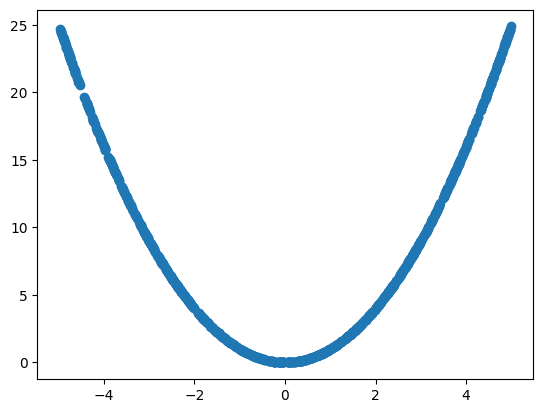

In [3]:
def make_data(n_samples, mid_range):
    X = np.random.random((n_samples,1))*mid_range-(mid_range/2)
    # eg. if n_samples = 10000, mid_range = 10 then it will create samples b/w 
    # 0 and 5 positive and negative
    y = X*X
    #print(X)
    return X,y

X, y = make_data(1000,10)
plt.scatter(X,y)
plt.show()


## Building your Model with Keras

Creates a model that has a number of hidden units (layer1_nodes) and then a final output unit.  See the keras documenation on Dense located here (https://keras.io/api/layers/core_layers/dense/) for more info.  The keras supported activiation functions are listed here: (https://keras.io/api/layers/activations/).





In [4]:
def make_model(layer1_nodes, activation_function='sigmoid'):
    """ relu activation, mse as loss and adam optimizer"""

    model = Sequential()
    model.add(Dense(layer1_nodes, input_shape=(1,), activation=activation_function))
    model.add(Dense(1))
    print(model.summary())
    model.compile(loss='mse', optimizer='adam')
    return model

## example code
mymodel = make_model(2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None


This function will train a Keras model.  At the end of the training, this code showcases using the return value from calling fit and plots the loss value at the end of each epoch.

In [5]:

def train_model(X, y, model, epochs, batch_size):
    ''' train the model for specified number of epochs, batch_size'''
    h = model.fit(X, y, validation_split=0.2,
               epochs=epochs,
               batch_size=batch_size,
               verbose=1)
    plt.figure(figsize=(15,2.5))
    plt.plot(h.history['loss'])
    return model

In [6]:
''' predict the model for X(training data) and or X2 which is outside 
the training dataset'''
def predict_model(X, y):
  pred = model.predict(X)
  mid_range = 20
  X2 = np.random.random((n_samples,1))*mid_range-(mid_range/2)
  pred2 = model.predict(X2)
  
  # uncomment below code to observe the expected and actual values
  # in the form (inputData, expectedOutputData, predictedOutputData, difference)
  
  #pred2 = model.predict([-6])
  #for i,j in zip(X, pred):
  #  print(i,i*i,j, j-(i*i))

  plt.figure(figsize=(10,3))
  plt.plot(X,pred, '.')
  plt.xlabel('x')
  plt.ylabel('prediction')
  plt.title('Prediction within training sample space')
  
  plt.figure(figsize=(10,3))
  plt.plot(X2,pred2, '.')
  plt.xlabel('x')
  plt.ylabel('prediction')
  plt.title('Prediction outside training sample space')

## Putting it all Together

This cell creates the data, builds and trains and model, and then uses the model to predict data both within the range of the training data and outside that range.

You should try changing the number of epochs, batch size, and number of neurons to see how they impact your results.


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
80/80 [==============================] - 1s 4ms/step - loss: 102.0478 - val_loss: 99.2555
Epoch 2/10
80/80 [==============================] - 0s 3ms/step - loss: 95.0816 - val_loss: 92.4644
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 88.4229 - val_loss: 85.8718
Epoch 4/10
80/80 [==============================] - 0s 2ms/step - loss: 81.9786 - val_loss: 79.5854
Epoch 5/10
80/80 [==============================

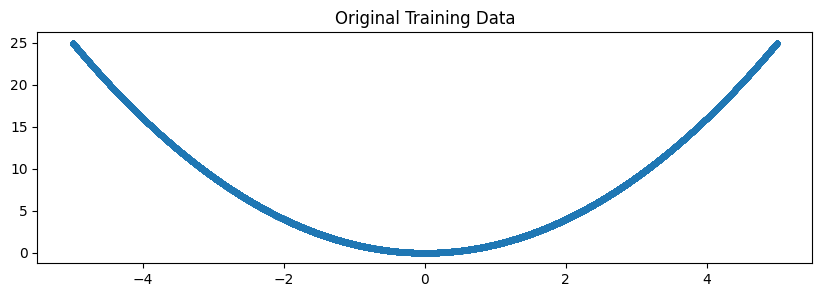

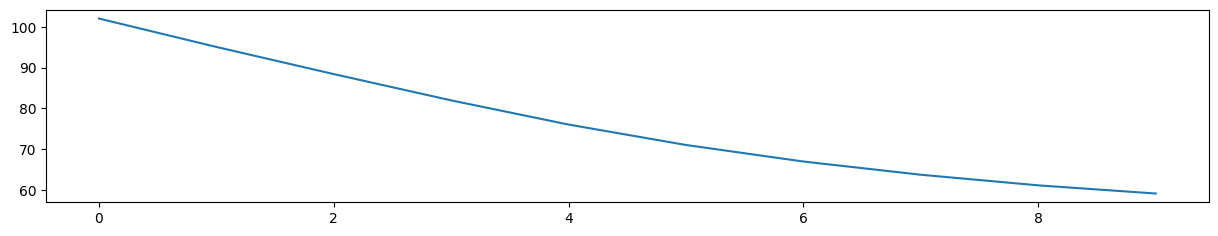

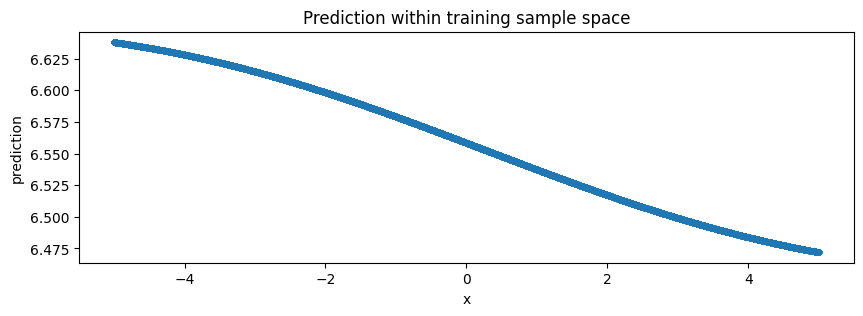

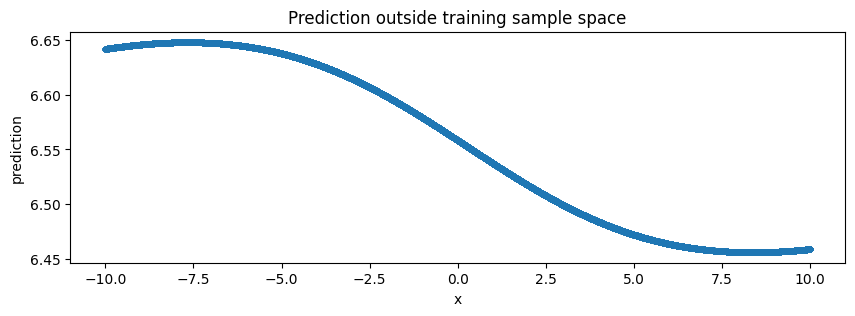

In [12]:
epochs    = 10
batch_size = 1000
num_neurons  = 10

X_train,y_train = make_data(n_samples, mid_range = 10)
X_test,y_test = make_data(n_samples, mid_range = 10)

model = make_model(num_neurons, activation_function='sigmoid')

plt.figure(figsize=(10,3))
plt.plot(X_train, y_train,'.')
plt.title('Original Training Data')
model = train_model(X_train, y_train, model, epochs, batch_size)
predict_model(X_train, X_test)

This is the Origional function it is bad because it doesnt converge to 0 andits perdictions are bad

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
16000/16000 [==============================] - 29s 2ms/step - loss: 18.6674 - val_loss: 0.0751
Epoch 2/5
16000/16000 [==============================] - 28s 2ms/step - loss: 0.0183 - val_loss: 0.0065
Epoch 3/5
16000/16000 [==============================] - 28s 2ms/step - loss: 0.0023 - val_loss: 8.6823e-04
Epoch 4/5
16000/16000 [==============================] - 28s 2ms/step - loss: 0.0012 - val_loss: 9.6821e-04
Epoch 5/5
3125/3125 [=

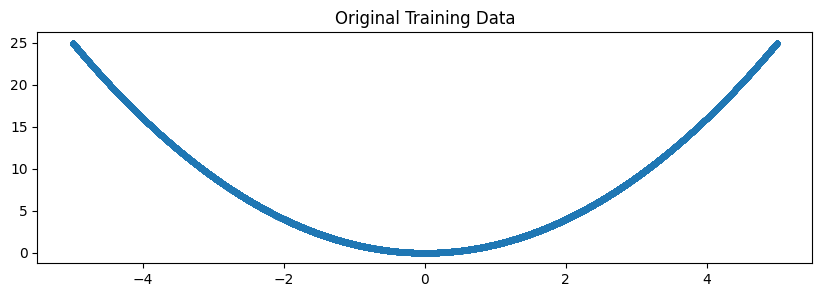

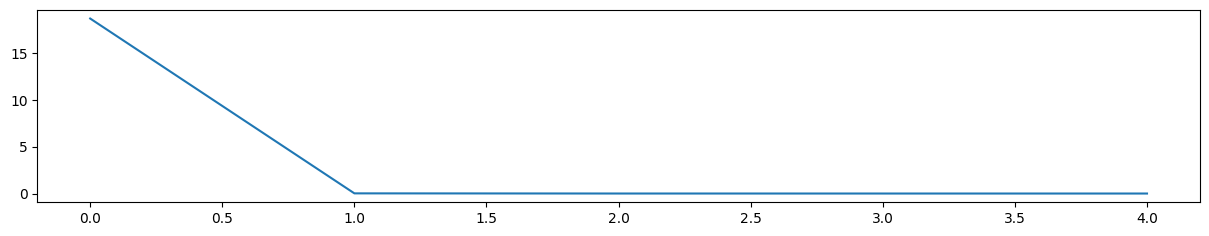

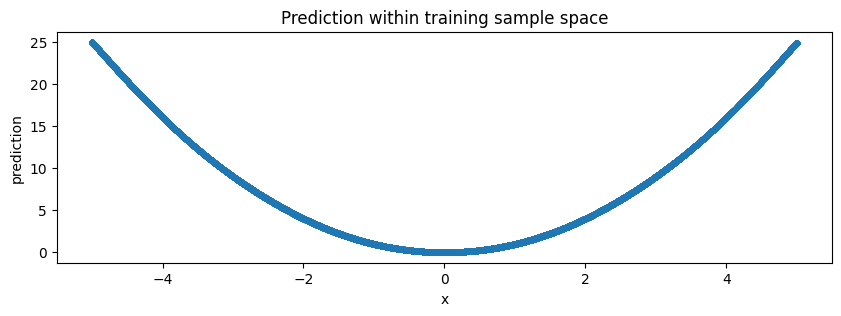

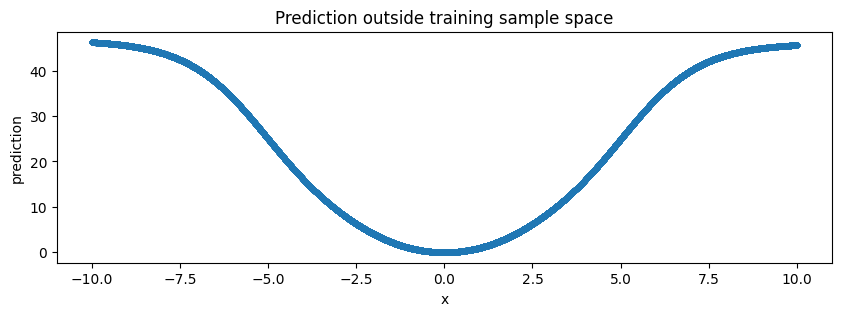

In [9]:
epochs    = 5
batch_size = 5
num_neurons  = 100

X_train,y_train = make_data(n_samples, mid_range = 10)
X_test,y_test = make_data(n_samples, mid_range = 10)

model = make_model(num_neurons, activation_function='sigmoid')

plt.figure(figsize=(10,3))
plt.plot(X_train, y_train,'.')
plt.title('Original Training Data')
model = train_model(X_train, y_train, model, epochs, batch_size)
predict_model(X_train, X_test)

This uses the sigmoid function like the original but only has 5 epochs and has a batch size of 5 with 100 neurons. This allows it to converge in one epoch and the prediction function is almost identical to the actual values and the prediction outside of sample space is very good too.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
16000/16000 [==============================] - 28s 2ms/step - loss: 1.7345 - val_loss: 1.3578e-04
Epoch 2/5
16000/16000 [==============================] - 28s 2ms/step - loss: 0.0011 - val_loss: 5.8975e-04
Epoch 3/5
16000/16000 [==============================] - 28s 2ms/step - loss: 0.0012 - val_loss: 3.5980e-04
Epoch 4/5
16000/16000 [==============================] - 29s 2ms/step - loss: 0.0011 - val_loss: 2.9724e-04
Epoch 5/5
3125/

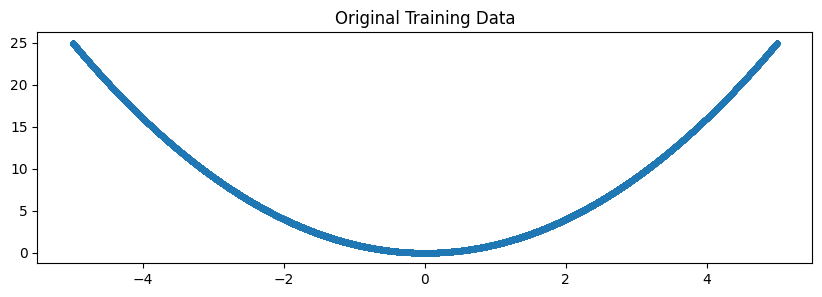

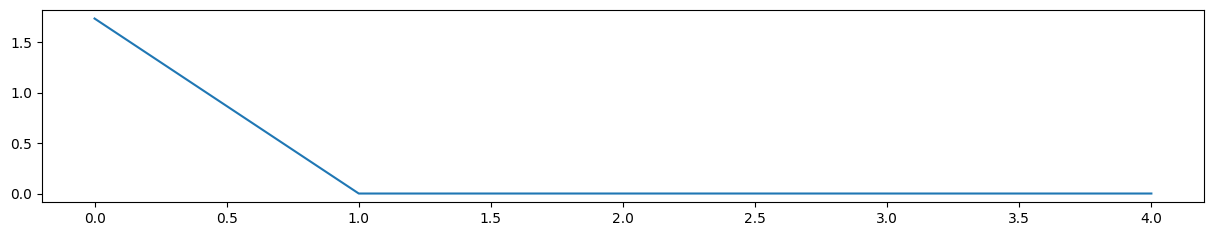

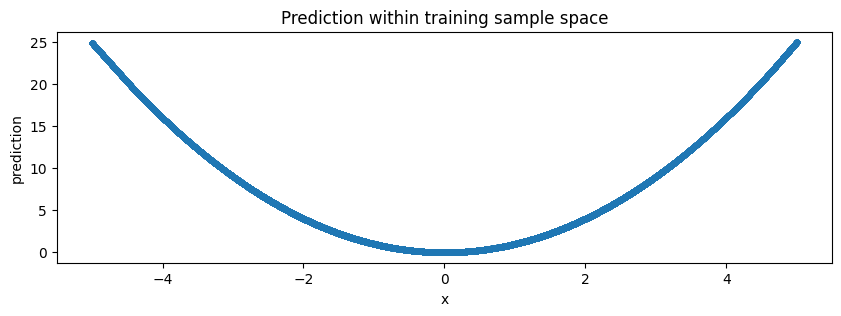

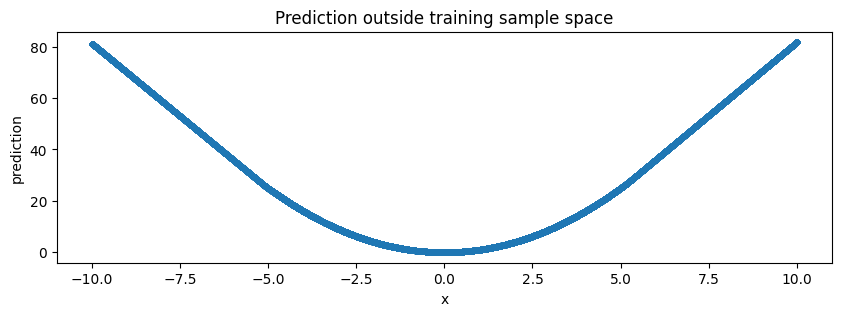

In [10]:
epochs    = 5
batch_size = 5
num_neurons  = 100

X_train,y_train = make_data(n_samples, mid_range = 10)
X_test,y_test = make_data(n_samples, mid_range = 10)

model = make_model(num_neurons, activation_function='relu')

plt.figure(figsize=(10,3))
plt.plot(X_train, y_train,'.')
plt.title('Original Training Data')
model = train_model(X_train, y_train, model, epochs, batch_size)
predict_model(X_train, X_test)

This uses the relu function and only has 5 epochs and has a batch size of 5 with 100 neurons. This allows it to converge in one epoch and the prediction function is almost identical to the actual values and the prediction outside of sample space is nearly identical to the original prediction function as well.